# LearnPlatform COVID-19 Impact on Digital Learning

Use digital learning data to analyze the impact of COVID-19 on student learning

# Data Description

We have provided a set of daily edtech engagement data from over 200 school districts in 2020, and we encourage you to leverage 
other publicly available data sources in your analysis. We include three basic sets of files to help you get started:

**Problem Statement:**

* The **COVID-19** Pandemic has disrupted learning for more than **56 million** students in the United States. 
 * In the Spring of **2020**, most *states and local governments* across the U.S. closed educational institutions to stop the spread of the virus. 
 * In response, schools and teachers have attempted to reach students remotely through *distance learning tools and digital platforms.*
 * Until today, concerns of the exacaberting *digital divide and long-term learning loss* among America’s most vulnerable learners continue to grow.



In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import district data

dist_data = pd.read_csv(r"C:\Users\polep\OneDrive\Desktop\Srujan\LearnPlatform-covid-19-impact-on-digital-learning\districts_info.csv")
dist_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# print shape of the dataframe
dist_data.shape

(233, 7)

In [4]:
# print the dataframe columns
dist_data.columns

Index(['district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'],
      dtype='object')

In [5]:
# print summary of the dataframe
dist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [6]:
# data describe
dist_data.describe(include = 'all')

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
count,233.000000,176,176,176,148,162,118
unique,NaN,23,4,5,5,2,11
top,NaN,Connecticut,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
freq,NaN,30,104,116,48,161,30
mean,5219.776824,NaN,NaN,NaN,NaN,NaN,NaN
std,2595.751581,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2991.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4937.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,7660.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#  check for missing values
dist_data.isna().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [8]:
# #drop rows which has missing values for all the columns
dist_data.dropna(thresh=6, inplace=True)

In [9]:
dist_data.isna().sum()

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            22
county_connections_ratio     4
pp_total_raw                50
dtype: int64

C:\Users\polep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


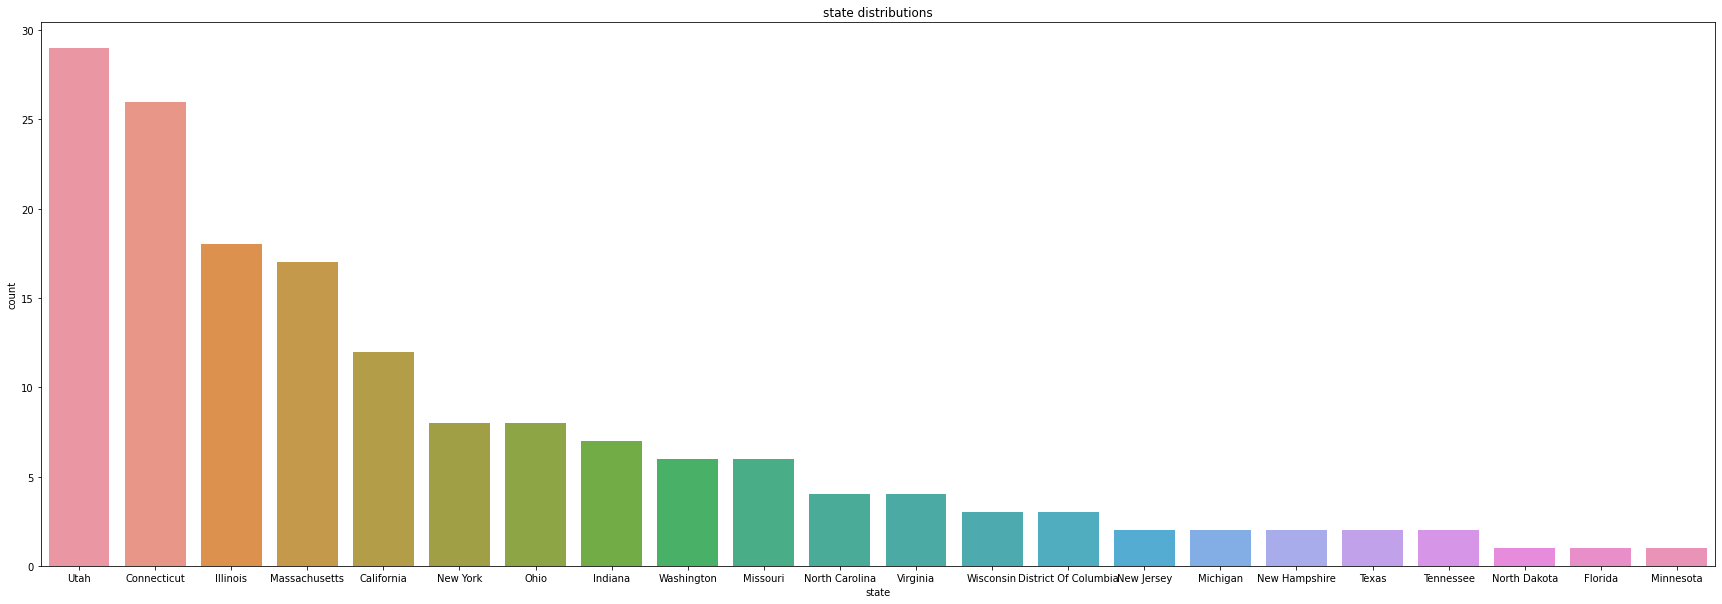

In [11]:
# # plot distribution of state column
plt.figure(figsize = (30, 10))
plt.title('state distributions')
sns.countplot('state', order = dist_data['state'].value_counts().index, data = dist_data);

In [12]:
# value counts of locale
dist_data['locale'].value_counts()

Suburb    96
Rural     31
City      27
Town      10
Name: locale, dtype: int64

C:\Users\polep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


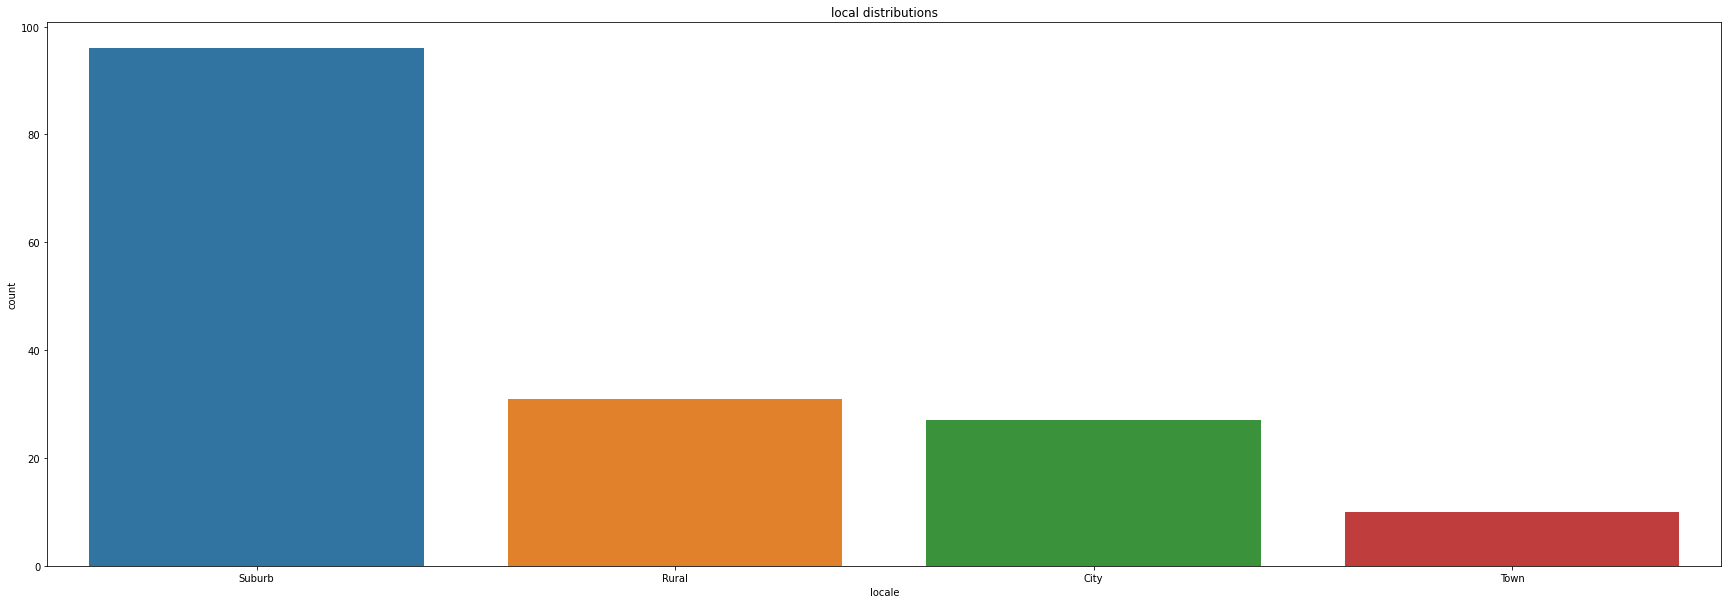

In [13]:
# # plot distribution of state column
plt.figure(figsize = (30, 10))
plt.title('local distributions')
sns.countplot('locale', order = dist_data['locale'].value_counts().index, data = dist_data);

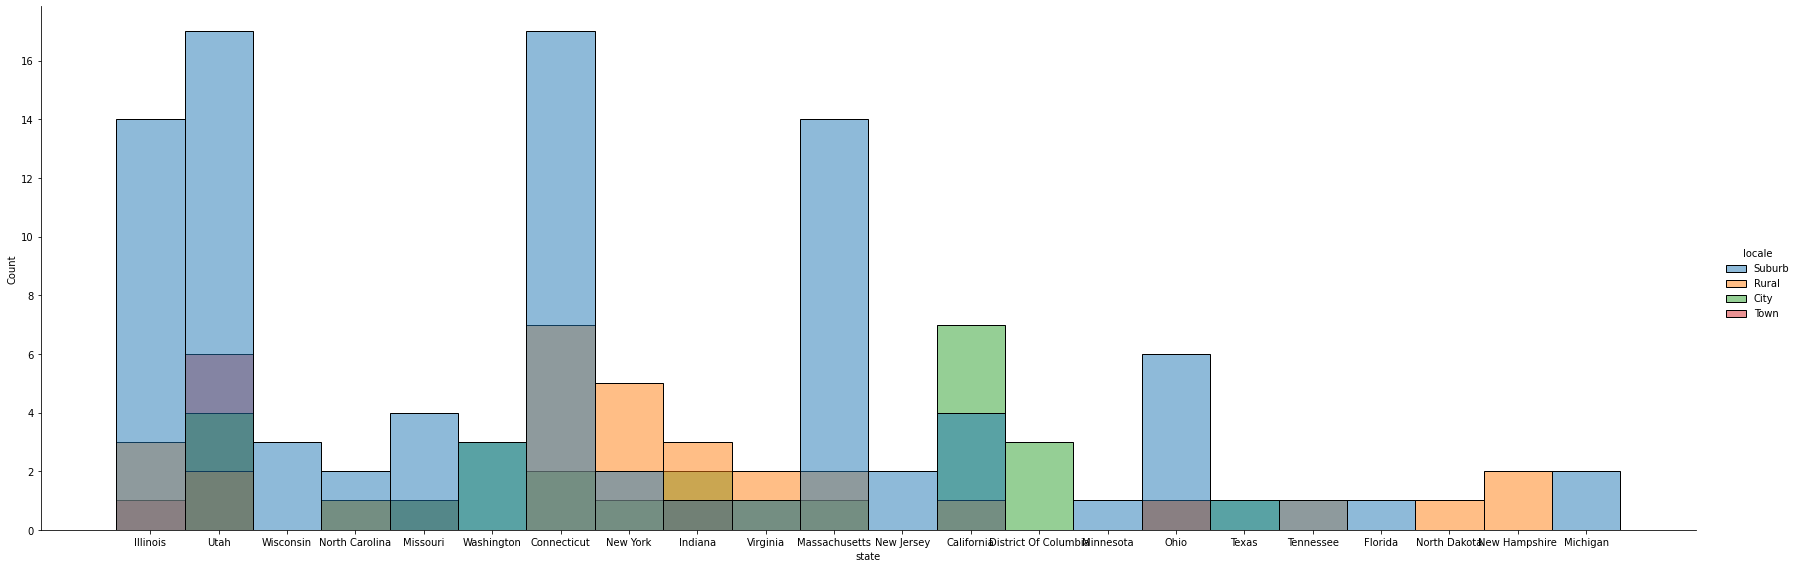

In [14]:
# distribution of state and locale
sns.displot(data=dist_data, x='state', hue= 'locale', height=8,aspect=3);

In [15]:
# process and separate pct_black/hispanic
dist_data['pct_black/hispanic'] = dist_data['pct_black/hispanic'].str.replace("[","", regex = True)
# split and seperate by commas
pct_black_hispanic = dist_data['pct_black/hispanic'].str.split(",",n=1,expand=True)
dist_data['pct_black'] = pct_black_hispanic[0]
dist_data['pct_hispanic'] = pct_black_hispanic[1]

# convert objects of pct_black and pct_hispani to numeric columns 
dist_data['pct_black'] = pd.to_numeric(dist_data['pct_black'])
dist_data['pct_hispanic'] = pd.to_numeric(dist_data['pct_hispanic'])


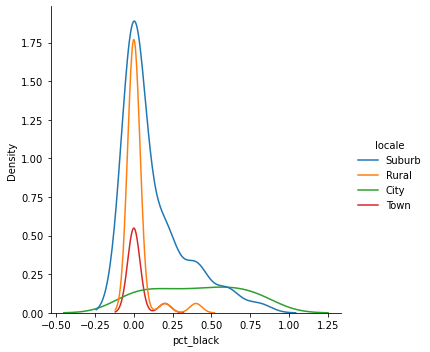

In [16]:
# plot distribution of pct_black 
sns.displot(data=dist_data, x='pct_black', hue='locale',kind='kde')

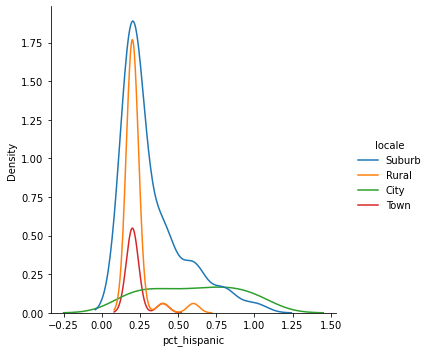

In [17]:
# plot distribution of pct_hispanic 
sns.displot(data=dist_data, x='pct_hispanic', hue='locale',kind='kde')

In [18]:
# process and separate pct_free/pct_reduced
dist_data['pct_free/reduced'] = dist_data['pct_free/reduced'].str.replace("[","", regex = True)

# split and seperate by commas
pct_free_reduced = dist_data['pct_free/reduced'].str.split(",",n=1,expand=True)
dist_data['pct_free'] = pct_free_reduced[0]
dist_data['pct_reduced'] = pct_free_reduced[1]

# convert objects of pct_free and pct_reduced to numeric columns 
dist_data['pct_free'] = pd.to_numeric(dist_data['pct_free'])
dist_data['pct_reduced'] = pd.to_numeric(dist_data['pct_reduced'])

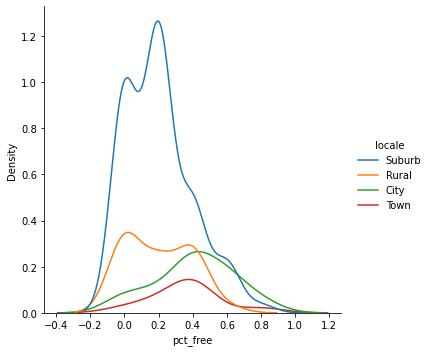

In [19]:
#  plot distribution of pct_free data
sns.displot(data=dist_data, x='pct_free', hue='locale',kind='kde')

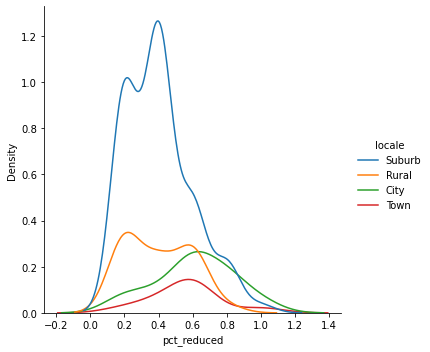

In [20]:
#  plot distribution of pct_reduced data
sns.displot(data=dist_data, x='pct_reduced', hue='locale',kind='kde')

In [21]:
# replacing regural expressions or special characters
dist_data['county_connections_ratio'] = dist_data['county_connections_ratio'].str.replace("[","", regex = True)

# split and seperate by commas
country_connection = dist_data['county_connections_ratio'].str.split(",",n=1,expand=True)
dist_data['county'] = country_connection[0]
dist_data['connections'] = country_connection[1]

# convert objects of county connections ratios to numeric columns 
dist_data['county'] = pd.to_numeric(dist_data['county'])
dist_data['connections'] = pd.to_numeric(dist_data['connections'])
dist_data['county'] = dist_data['county'].fillna(dist_data['county'].median())
dist_data['connections'] = dist_data['connections'].fillna(dist_data['connections'].median())

dist_data['cc_ratio'] = dist_data['county'].astype(str) + ':' + dist_data['connections'].astype(str)


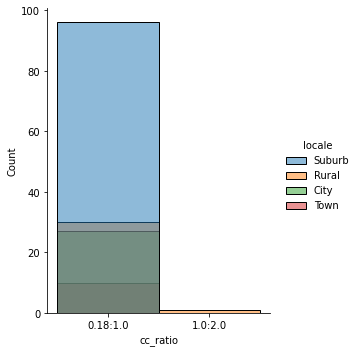

In [22]:
#  plot distribution of cc_ratio data with locale
sns.displot(data=dist_data, x="cc_ratio", hue='locale', height=5, aspect=.8)

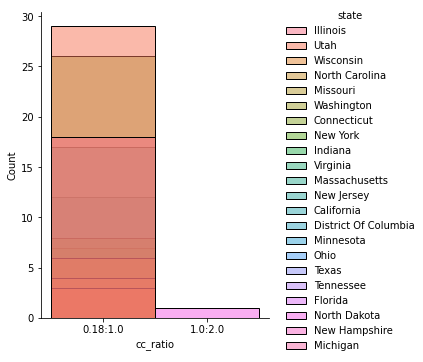

In [23]:
# #  plot distribution of cc_ratio with state
sns.displot(data=dist_data, x="cc_ratio", hue='state', height=5, aspect=.8)

In [24]:
# replacing regural expressions or special characters
dist_data['pp_total_raw'] = dist_data['pp_total_raw'].str.replace("[","", regex = True)

# split and seperate by commas
total_raw = dist_data['pp_total_raw'].str.split(",",n=1,expand=True)
dist_data['pp_locale'] = total_raw[0]
dist_data['pp_federal'] = total_raw[1]

# convert objects of total raw to numeric columns 
dist_data['pp_locale'] = pd.to_numeric(dist_data['pp_locale'])
dist_data['pp_federal'] = pd.to_numeric(dist_data['pp_federal'])

dist_data['pp_locale'] = dist_data['pp_locale'].fillna(dist_data['pp_locale'].median())
dist_data['pp_federal'] = dist_data['pp_federal'].fillna(dist_data['pp_federal'].median())

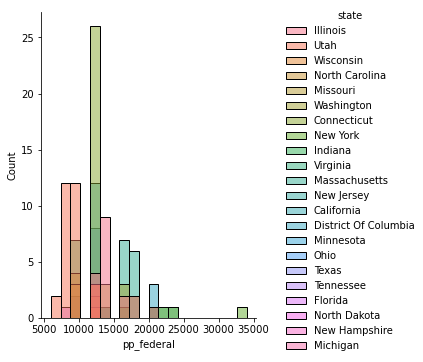

In [25]:
# plot distribution of federal with state column
sns.displot(data=dist_data, x="pp_federal", hue='state', height=5, aspect=.8)

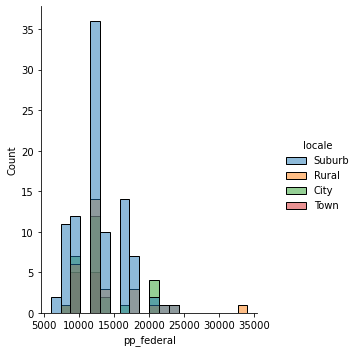

In [26]:
# plot distribution of federal with locale column
sns.displot(data=dist_data, x="pp_federal", hue='locale', height=5, aspect=.8)

In [27]:
#drop columns which is not required for EDA
final_dist_data = dist_data.drop(columns=['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw','county','connections'])
final_dist_data.head()

,district_id,state,locale,pct_black,pct_hispanic,pct_free,pct_reduced,cc_ratio,pp_locale,pp_federal
0,8815,Illinois,Suburb,0.0,0.2,0.0,0.2,0.18:1.0,14000.0,16000.0
2,4921,Utah,Suburb,0.0,0.2,0.2,0.4,0.18:1.0,6000.0,8000.0
5,5987,Wisconsin,Suburb,0.0,0.2,0.0,0.2,0.18:1.0,10000.0,12000.0
6,3710,Utah,Suburb,0.0,0.2,0.4,0.6,0.18:1.0,6000.0,8000.0
7,7177,North Carolina,Suburb,0.2,0.4,0.2,0.4,0.18:1.0,8000.0,10000.0


**Data Definition:**

Product information data
* The product file products_info.csv includes information about the characteristics of the top 372 products with most users in 2020. 
 * The categories listed in this file are part of LearnPlatform's product taxonomy. Data were labeled by our team. 
 * Some products may not have labels due to being duplicate, lack of accurate url or other reasons.

In [28]:
# read the data from the local database

prod_data = pd.read_csv(r'C:\Users\polep\OneDrive\Desktop\Srujan\LearnPlatform-covid-19-impact-on-digital-learning\products_info.csv')
prod_data.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [29]:
# shape of product data
prod_data.shape

(372, 6)

In [30]:
# data columns of product data
prod_data.columns

Index(['LP ID', 'URL', 'Product Name', 'Provider/Company Name', 'Sector(s)',
       'Primary Essential Function'],
      dtype='object')

In [31]:
# summary of the dataframe
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [32]:
# checking for missing values
prod_data.isna().sum()

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

In [33]:
# drop missing values
prod_data.dropna(thresh=6, inplace=True)

In [34]:
prod_data.isna().sum()

LP ID                         0
URL                           0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
dtype: int64

In [35]:
# rename dataframe columns
prod_data = prod_data.rename(columns = {'LP ID' : 'lp_id', 'Product Name': 'Product_Name', 'Sector(s)': 'sector', 'Primary Essential Function': 'Primary_Essential_Function'})

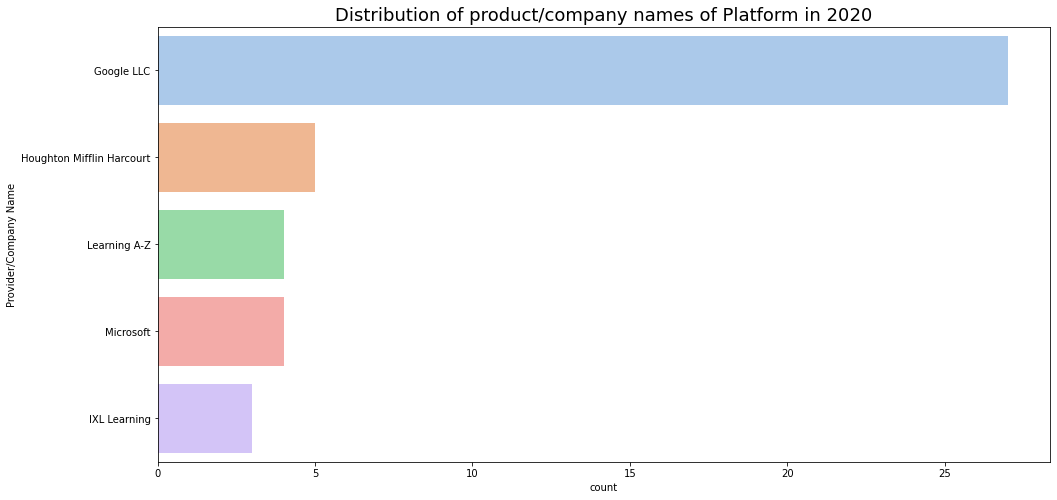

In [36]:
#  plot distribution of the product company names
plt.figure(figsize = (16,8))

sns.countplot(data=prod_data, y="Provider/Company Name", order=prod_data['Provider/Company Name'].value_counts().index[:5], palette='pastel')
plt.title('Distribution of product/company names of Platform in 2020', size=18)
plt.show()


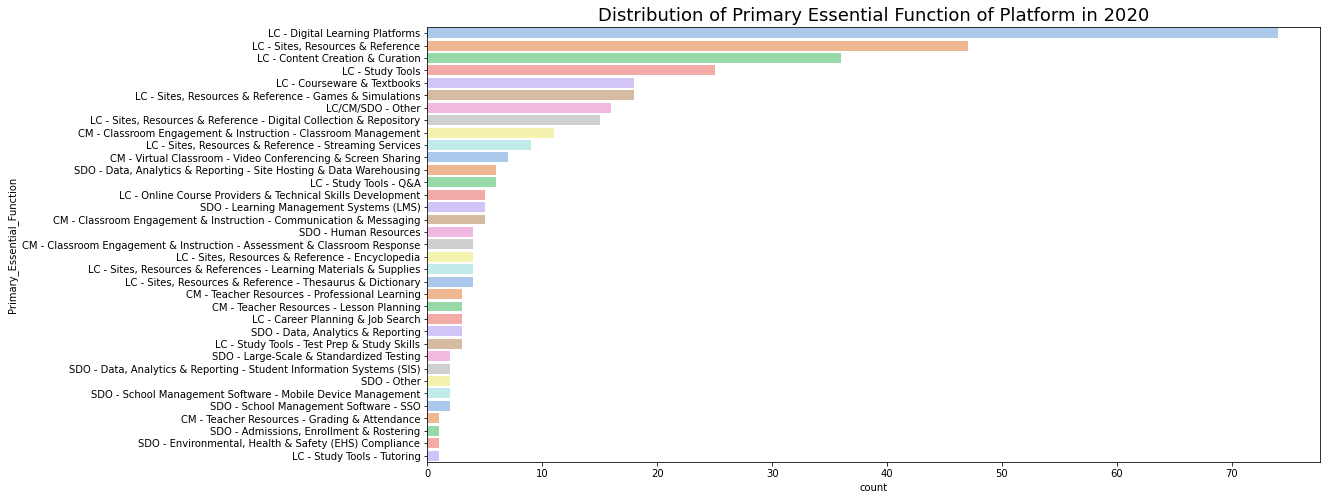

In [37]:
#  plot distribution of the primary essential functions
plt.figure(figsize = (16,8))

sns.countplot(data=prod_data, y="Primary_Essential_Function", order=prod_data['Primary_Essential_Function'].value_counts().index[:], palette='pastel')
plt.title('Distribution of Primary Essential Function of Platform in 2020', size=18)
plt.show()


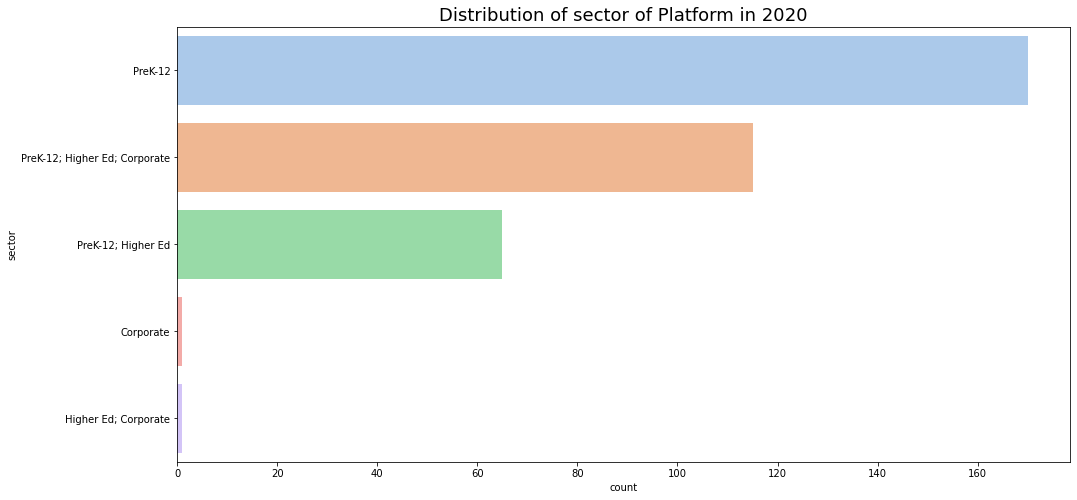

In [38]:
# #  plot distribution of the sector of platform
plt.figure(figsize = (16,8))

sns.countplot(data=prod_data, y="sector", order=prod_data['sector'].value_counts().index[:], palette='pastel')
plt.title('Distribution of sector of Platform in 2020', size=18)
plt.show()


# Engagement Data:

**Data Definition:**

Engagement data
* The engagement data are aggregated at school district level, and each file in the folder engagement_data represents data from one school district. 
 * The 4-digit file name represents district_id which can be used to link to district information in district_info.csv. 
 * The lp_id can be used to link to product information in product_info.csv.

In [39]:
# Importing package numpys (For Numerical Python)
import numpy as np 
# Importing for data analysis
import pandas as pd 
# module finds all the pathnames matching a specified pattern
import glob 
# module provides a portable way of using operating system dependent functionality
import os 
 # Importing pyplot interface using matplotlib
import matplotlib.pyplot as plt 
# Importing seaborn library for interactive visualization
import seaborn as sns 

#Loading CSV files for engagement_data
path = r'C:\Users\polep\OneDrive\Desktop\Srujan\LearnPlatform-covid-19-impact-on-digital-learning\engagement_data'
print(path)
csv_files = glob.glob(os.path.join(path, "*.csv"))
data = []
# loop over the list of csv files
for f in csv_files:
    # read the csv file
    frame = pd.read_csv(f)
    # split filename and extension
    filename = os.path.splitext(f)
    # extract district ID from CSV filename tuple
    frame['district_id'] = os.path.basename(filename[0])
    # add new column to new list
    data.append(frame)
    
    # create dataframe for engagement data
    engagement_data = pd.concat(data)

C:\Users\polep\OneDrive\Desktop\Srujan\LearnPlatform-covid-19-impact-on-digital-learning\engagement_data


In [40]:
engagement_data['district_id'] = pd.to_numeric(engagement_data['district_id'])
engagement_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22324190 entries, 0 to 98449
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1021.9+ MB


In [41]:
# merge dataframe using district_id as key
learnPlatform_data = pd.merge(engagement_data,final_dist_data,on=['district_id'])

In [42]:
learnPlatform_data.head()

,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black,pct_hispanic,pct_free,pct_reduced,cc_ratio,pp_locale,pp_federal
0,2020-01-01,93690.0,0.00,NaN,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0
1,2020-01-01,17941.0,0.03,0.90,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0
2,2020-01-01,65358.0,0.03,1.20,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0
3,2020-01-01,98265.0,0.57,37.79,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0
4,2020-01-01,59257.0,0.00,NaN,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0


In [43]:
learnPlatform_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16418097 entries, 0 to 16418096
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
 5   state             object 
 6   locale            object 
 7   pct_black         float64
 8   pct_hispanic      float64
 9   pct_free          float64
 10  pct_reduced       float64
 11  cc_ratio          object 
 12  pp_locale         float64
 13  pp_federal        float64
dtypes: float64(9), int64(1), object(4)
memory usage: 1.8+ GB


In [44]:
final_learnPlatform_data = pd.merge(learnPlatform_data,prod_data,on=['lp_id'])
final_learnPlatform_data.head()

,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black,pct_hispanic,pct_free,pct_reduced,cc_ratio,pp_locale,pp_federal,URL,Product_Name,Provider/Company Name,sector,Primary_Essential_Function
0,2020-01-01,93690.0,0.00,NaN,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference"
1,2020-01-02,93690.0,0.15,7.79,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference"
2,2020-01-15,93690.0,0.03,0.30,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference"
3,2020-01-22,93690.0,0.06,1.49,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference"
4,2020-01-23,93690.0,0.03,0.30,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18:1.0,10000.0,12000.0,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference"


In [45]:
final_learnPlatform_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8187970 entries, 0 to 8187969
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   time                        object 
 1   lp_id                       float64
 2   pct_access                  float64
 3   engagement_index            float64
 4   district_id                 int64  
 5   state                       object 
 6   locale                      object 
 7   pct_black                   float64
 8   pct_hispanic                float64
 9   pct_free                    float64
 10  pct_reduced                 float64
 11  cc_ratio                    object 
 12  pp_locale                   float64
 13  pp_federal                  float64
 14  URL                         object 
 15  Product_Name                object 
 16  Provider/Company Name       object 
 17  sector                      object 
 18  Primary_Essential_Function  object 
dtypes: float64(9), int64(

In [46]:
final_learnPlatform_data.shape

(8187970, 19)

In [47]:
#Top 10 products

products_temp=pd.DataFrame(final_learnPlatform_data.groupby('Product_Name',dropna=False)['engagement_index'].sum()/1000000).reset_index()
products_temp.columns=['Product Name','Amount']
products_temp=products_temp.sort_values('Amount',ascending=False)
products_temp=products_temp[0:10]
products_temp=products_temp.fillna('Unknown')

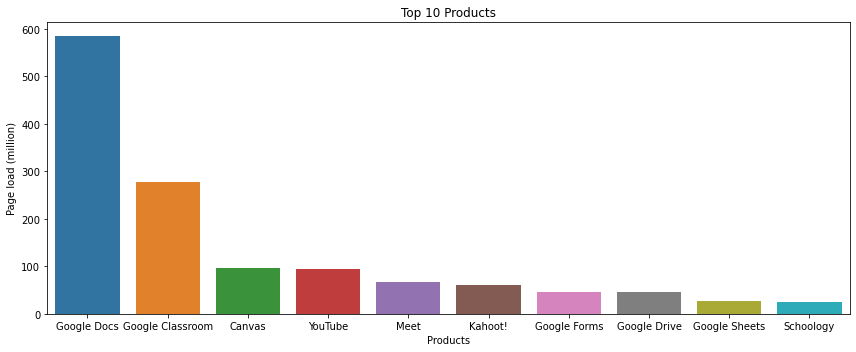

In [48]:
plt.figure(figsize=(12,5))
g1=sns.barplot(x=products_temp['Product Name'],y=products_temp['Amount'])
plt.xlabel('Products')
plt.ylabel('Page load (million)')
plt.title('Top 10 Products')
plt.tight_layout()

Key Observations Top 10 products

. out of top 5 products, 4 products are managed by Google. Those 4 products are Google Docs, Google Classroom,Youtube, meet.

. The page load for google docs is 769 million and the page load for Goggle classroom is 373 million

. Canva is in 3rd position

. unknown stands in 2nd position can be assumed to be coming from many products

In [49]:
# top ten providers
providers_temp=pd.DataFrame(final_learnPlatform_data.groupby('Provider/Company Name',dropna=False)['engagement_index'].sum()/1000000).reset_index()
providers_temp.columns=['Provider/Company Name','Amount']
providers_temp=providers_temp.sort_values('Amount',ascending=False)
providers_temp=providers_temp[0:10]
providers_temp=providers_temp.fillna('Unknown')


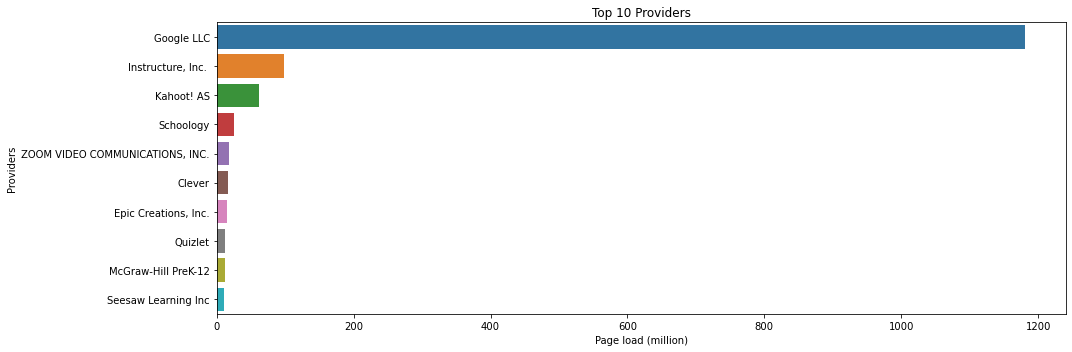

In [50]:
#plot
plt.figure(figsize=(15,5))
g2=sns.barplot(x=providers_temp['Amount'],y=providers_temp['Provider/Company Name'],orient='h')
plt.ylabel('Providers')
plt.xlabel('Page load (million)')
plt.title('Top 10 Providers')
plt.tight_layout()

Key Observations Top 10 providers

. Google outperforms all the other providers with 1581 million page-load

. Instructure stands (Canva) in second place with 138 million page-load

. Kahoot stands in 3rd place with 87.4 million page-load

In [51]:
#Page load by state
state_temp=pd.DataFrame(final_learnPlatform_data.groupby('state',dropna=False)['engagement_index'].sum()/1000000).reset_index()
state_temp.columns=['state','Amount']
state_temp=state_temp.sort_values('Amount',ascending=False)
state_temp=state_temp.fillna('Unknown')


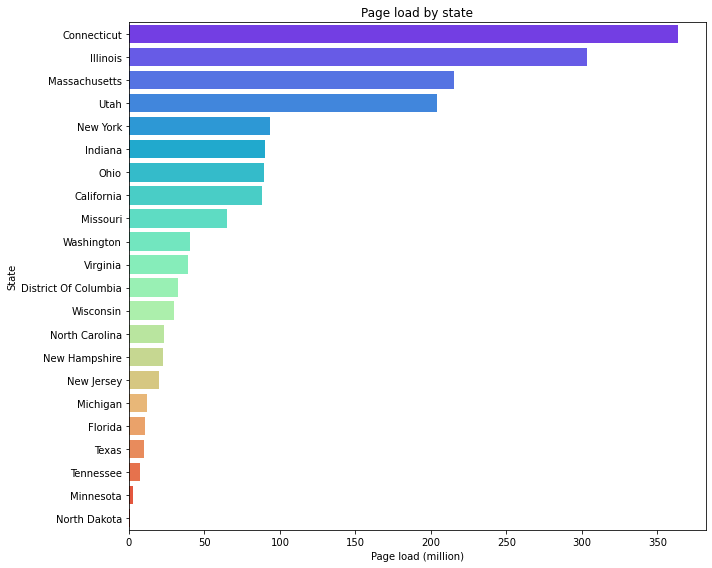

In [52]:
#plot
plt.figure(figsize=(10,8))
g3=sns.barplot(x=state_temp['Amount'],y=state_temp['state'],orient='h',palette='rainbow')
plt.ylabel('State')
plt.xlabel('Page load (million)')
plt.title('Page load by state')
plt.tight_layout()

Key Observations on Page load by state

. In the analysis the page-load which doesn't correspond to any state is labelled as unknown.

. Nearly 40% of the total page-load comes from the following states Connecticut, Illinois and Massachusetts.

In [53]:
#Page load by Locale
locale_temp=pd.DataFrame(final_learnPlatform_data.groupby('locale',dropna=False)['engagement_index'].sum()/1000000).reset_index()
locale_temp.columns=['locale','Amount']
locale_temp=locale_temp.sort_values('Amount',ascending=False)
locale_temp=locale_temp.fillna('Unknown')


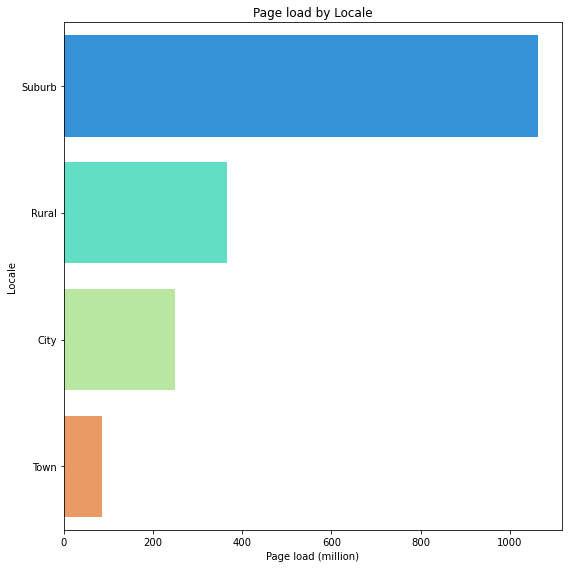

In [54]:
#plot
plt.figure(figsize=(8,8))
g4=sns.barplot(x=locale_temp['Amount'],y=locale_temp['locale'],orient='h',palette='rainbow')
plt.ylabel('Locale')
plt.xlabel('Page load (million)')
plt.title('Page load by Locale')
plt.tight_layout()

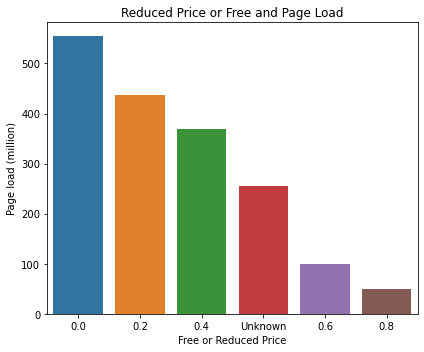

In [56]:
reduced_free=pd.DataFrame(final_learnPlatform_data.groupby('pct_free',dropna=False)['engagement_index'].sum()/1000000).reset_index()
reduced_free.columns=['pct_free','Amount']
reduced_free=reduced_free.sort_values('Amount',ascending=False)
reduced_free=reduced_free.fillna('Unknown')


plt.figure(figsize=(6,5))
sns.barplot(x=reduced_free['pct_free'],y=reduced_free['Amount'])
plt.xlabel('Free or Reduced Price')
plt.ylabel('Page load (million)')
plt.title('Reduced Price or Free and Page Load')
plt.tight_layout()

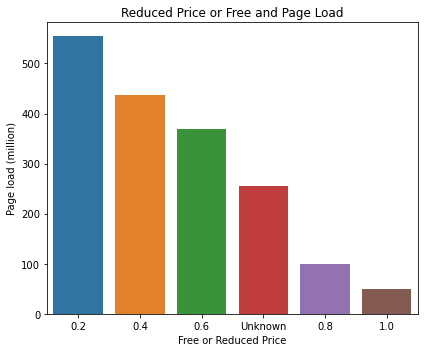

In [57]:
reduced_free=pd.DataFrame(final_learnPlatform_data.groupby('pct_reduced',dropna=False)['engagement_index'].sum()/1000000).reset_index()
reduced_free.columns=['pct_reduced','Amount']
reduced_free=reduced_free.sort_values('Amount',ascending=False)
reduced_free=reduced_free.fillna('Unknown')


plt.figure(figsize=(6,5))
sns.barplot(x=reduced_free['pct_reduced'],y=reduced_free['Amount'])
plt.xlabel('Free or Reduced Price')
plt.ylabel('Page load (million)')
plt.title('Reduced Price or Free and Page Load')
plt.tight_layout()

Reduced Price and Per-pupil Expenditure relation with page-load

- A combination of 40%-60% reduced price and 8,000-10,000  total expenditure has the highest page-load of 141.1 million.

- The next 2 highest page-load are coming from page-load

- A combination of 0%-20% reduced price and 10,000-12,000 and

- A combination of 20%-40% reduced price and 8,000-10,000